# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
from scipy import stats

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [3]:
#Testing out new citipy library
oakland = citipy.nearest_city(37.8044, -122.2711)
print(oakland.city_name)
print(oakland.country_code)

oakland
us


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)  #weather api may not have all the cities in our random list

561

In [5]:
#check series
cities[100]

'kyren'

In [6]:
#check weather api json format 
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "kyren"
 
query_url = url + "appid=" + api_key + "&q=" + city

#check url
print(query_url)

#json-ify api request
response = requests.get(query_url).json()

#check json
pprint(response)

#check weather data
print(f"city name: {response['name']}")
print(f"humidity: {response['main']['humidity']}")
print(f"latitude: {response['coord']['lat']}")
print(f"cloudiness: {response['clouds']['all']}")

http://api.openweathermap.org/data/2.5/weather?appid=679fa43e38b0c6228c8e1c7e7378c6ec&q=kyren
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.68, 'lon': 102.13},
 'dt': 1554144407,
 'id': 2021031,
 'main': {'grnd_level': 847.04,
          'humidity': 69,
          'pressure': 1025.28,
          'sea_level': 1025.28,
          'temp': 264.4,
          'temp_max': 264.4,
          'temp_min': 264.4},
 'name': 'Kyren',
 'sys': {'country': 'RU',
         'message': 0.0033,
         'sunrise': 1554158744,
         'sunset': 1554205465},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 282.011, 'speed': 0.84}}
city name: Kyren
humidity: 69
latitude: 51.68
cloudiness: 0


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#new container to hold cities within api call
unique_cities = []

#Set base URL and parameters
params = {"appid":api_key}
url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")
print("------------------------")

#Loop through cities list and print index value and city name
for city in cities:
    
    #Pull in city from list
    params["q"] = city
    
    #query url with city
    response = requests.get(url,params).json()
    
    #print city and index value
    try:
        print(f"Processing Record {cities.index(city)} | {response['name']}")
        
        # If the city is in weather api, then add it to new unique cities list
        if city not in unique_cities:
            unique_cities.append(city)
    
    #if no city exist for the lng, lat, then skip
    except (KeyError, IndexError):
        print("City not found. Skipping...")


Beginning Data Retrieval
------------------------
Processing Record 0 | Hasaki
Processing Record 1 | Fairbanks
Processing Record 2 | Airai
Processing Record 3 | Balkanabat
Processing Record 4 | Lagoa
Processing Record 5 | La Paz
Processing Record 6 | Wanning
Processing Record 7 | Nhulunbuy
Processing Record 8 | Khandyga
Processing Record 9 | Khanna
Processing Record 10 | Atuona
Processing Record 11 | Rikitea
Processing Record 12 | Honiara
Processing Record 13 | Ushuaia
Processing Record 14 | Qaanaaq
Processing Record 15 | Nome
Processing Record 16 | Mataura
Processing Record 17 | Waipawa
Processing Record 18 | Jamestown
Processing Record 19 | Yima
Processing Record 20 | Salalah
Processing Record 21 | Chokurdakh
Processing Record 22 | Hobart
City not found. Skipping...
Processing Record 24 | Port Alfred
Processing Record 25 | Yellowknife
Processing Record 26 | Victoria
Processing Record 27 | East London
Processing Record 28 | Labuhan
City not found. Skipping...
Processing Record 30 | Fa

Processing Record 254 | Arlit
Processing Record 255 | Ambunti
Processing Record 256 | Vila Franca do Campo
Processing Record 257 | Maniitsoq
Processing Record 258 | Igarka
Processing Record 259 | Gararu
Processing Record 260 | Cedro
City not found. Skipping...
Processing Record 262 | Lakatoro
Processing Record 263 | Gazimurskiy Zavod
Processing Record 264 | Padang
Processing Record 265 | Makasar
Processing Record 266 | Orange Cove
Processing Record 267 | Cabo San Lucas
City not found. Skipping...
Processing Record 269 | Ritchie
Processing Record 270 | Mehamn
Processing Record 271 | Loudi
Processing Record 272 | Rebrikha
Processing Record 273 | Aksu
Processing Record 274 | Garden City
Processing Record 275 | Boyuibe
Processing Record 276 | Viransehir
Processing Record 277 | Kamphaeng Phet
Processing Record 278 | Esperance
Processing Record 279 | Itarema
Processing Record 280 | Gumdag
Processing Record 281 | Douentza
Processing Record 282 | College
Processing Record 283 | Upata
Processin

Processing Record 504 | Vidim
Processing Record 505 | Kutum
Processing Record 506 | Yarada
Processing Record 507 | Kalmunai
Processing Record 508 | Fillan
Processing Record 509 | Sihora
Processing Record 510 | Jinxiang
Processing Record 511 | Praia
Processing Record 512 | Coahuayana
Processing Record 513 | Auki
Processing Record 514 | Sistranda
Processing Record 515 | Tiarei
Processing Record 516 | Te Anau
Processing Record 517 | Plotnikovo
Processing Record 518 | Kadungora
Processing Record 519 | Cantapoy
Processing Record 520 | Kysyl-Syr
Processing Record 521 | Thinadhoo
Processing Record 522 | Narok
Processing Record 523 | Ballina
Processing Record 524 | Paita
Processing Record 525 | Kamina
Processing Record 526 | Alice Springs
City not found. Skipping...
Processing Record 528 | Konya
Processing Record 529 | Praia da Vitoria
Processing Record 530 | Sivaki
Processing Record 531 | Orel
Processing Record 532 | Valparaiso
Processing Record 533 | Saint-Augustin
Processing Record 534 | Fl

In [15]:
#check number of cities in clean city list
len(unique_cities)

504

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#create data frame from cities list
weather_df = pd.DataFrame(unique_cities)
weather_df = weather_df.rename(columns={0:"city"})

#set containers in new weather dataframe to hold json values
weather_df["city_id"] = ""
weather_df["date"] = ""
weather_df["lat"] = ""
weather_df["lon"] = ""
weather_df["country"] = ""
weather_df["maxTemp"] = ""
weather_df["cloudiness"] = ""
weather_df["humidity"] = ""
weather_df["windSpeed"] = ""

#display empty dataframe
weather_df.head()

,city,city_id,date,lat,lon,country,maxTemp,cloudiness,humidity,windSpeed
0,hasaki,,,,,,,,,
1,fairbanks,,,,,,,,,
2,airai,,,,,,,,,
3,balkanabat,,,,,,,,,
4,lagoa,,,,,,,,,


In [10]:
#Set base URL and parameters
params = {"appid":api_key}
url = "http://api.openweathermap.org/data/2.5/weather?"

#Loop through clean cities dataframe and append values for plot
for index,row in weather_df.iterrows():
    
    #Pull in city from list
    params["q"] = row['city']
    
    #query url with city
    response = requests.get(url,params).json()
    
    #append weather data to dataframe

    weather_df.loc[index,"city_id"] = response['id']
    weather_df.loc[index,"date"] = time.strftime("%d %b %Y", time.localtime(response['dt'])) 
    weather_df.loc[index,"lat"] = response['coord']['lat']
    weather_df.loc[index,"lon"] = response['coord']['lon']
    weather_df.loc[index,"country"] = response['sys']['country']
    weather_df.loc[index,"maxTemp"] = response['main']['temp_max']
    weather_df.loc[index,"cloudiness"] = response['clouds']['all']
    weather_df.loc[index,"humidity"] = response['main']['humidity']
    weather_df.loc[index,"windSpeed"] = response['wind']['speed']

In [11]:
#display full populated dataframe
weather_df.head()

,city,city_id,date,lat,lon,country,maxTemp,cloudiness,humidity,windSpeed
0,hasaki,2112802,01 Apr 2019,35.73,140.83,JP,275.37,75,93,2.1
1,fairbanks,5861897,01 Apr 2019,64.84,-147.72,US,276.48,1,82,1.5
2,airai,1651810,01 Apr 2019,-8.93,125.41,TL,293.5,24,90,0.67
3,balkanabat,161616,01 Apr 2019,39.51,54.36,TM,283.75,92,94,2.47
4,lagoa,2267254,01 Apr 2019,37.14,-8.45,PT,290.15,20,72,7.7


In [12]:
#convert to correct data type for analysis

float_list = ['lat','lon','maxTemp','windSpeed']
int_list = ['cloudiness','humidity']

for column in float_list:
    weather_df[column] = weather_df[column].astype(float)
for column in int_list:
    weather_df[column] = weather_df[column].astype(int)

#check data types
weather_df.dtypes

city           object
city_id        object
date           object
lat           float64
lon           float64
country        object
maxTemp       float64
cloudiness      int64
humidity        int64
windSpeed     float64
dtype: object

In [16]:
#Export weather data to csv
weather_df.to_csv("output_data/weather_01Apr2019_sample.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

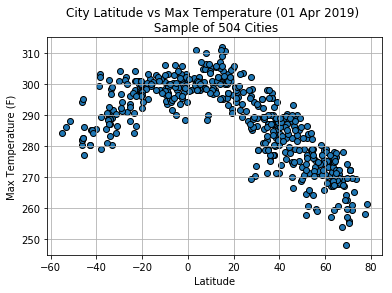

In [17]:
plt.scatter(weather_df['lat'],weather_df['maxTemp'],marker='o',edgecolor='black')
plt.grid()
today_dt = datetime.datetime.now()
plt.title(f"City Latitude vs Max Temperature ({today_dt.strftime('%d %b %Y')}) \n Sample of 504 Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("output_data/fig1_MaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

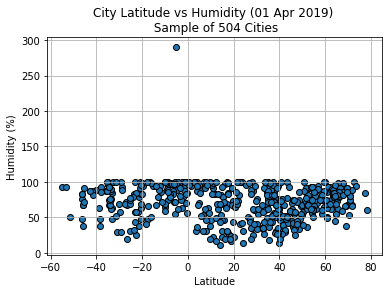

In [18]:
plt.scatter(weather_df['lat'],weather_df['humidity'],marker='o',edgecolor='black')
plt.grid()
plt.title(f"City Latitude vs Humidity ({today_dt.strftime('%d %b %Y')}) \n Sample of 504 Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/fig2_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

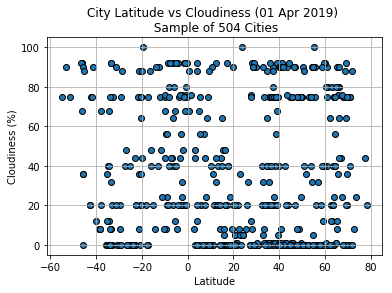

In [19]:
plt.scatter(weather_df['lat'],weather_df['cloudiness'],marker='o',edgecolor='black')
plt.grid()
plt.title(f"City Latitude vs Cloudiness ({today_dt.strftime('%d %b %Y')}) \n Sample of 504 Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/fig3_Cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

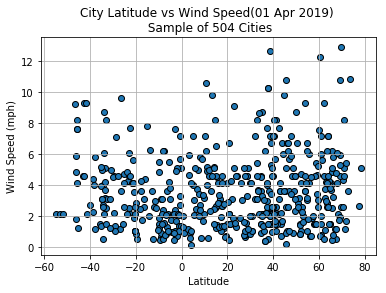

In [20]:
plt.scatter(weather_df['lat'],weather_df['windSpeed'],marker='o',edgecolor='black')
plt.grid()
plt.title(f"City Latitude vs Wind Speed({today_dt.strftime('%d %b %Y')}) \n Sample of 504 Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/fig4_WindSpeed.png")
plt.show()

#### Analysis

In [21]:
#There is an outlier (check the city with humidity > 200%)
weather_df[weather_df["humidity"]>200]

,city,city_id,date,lat,lon,country,maxTemp,cloudiness,humidity,windSpeed
470,paita,3694112,01 Apr 2019,-5.09,-81.11,PE,290.15,40,290,3.84


In [22]:
#Descriptive stats
weather_df.describe()

,lat,lon,maxTemp,cloudiness,humidity,windSpeed
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,20.571925,16.185754,287.763988,36.188492,70.845238,3.511845
std,33.409711,91.452366,12.728959,34.571248,24.661120,2.364825
min,-54.810000,-179.170000,248.000000,0.000000,11.000000,0.140000
25%,-5.705000,-62.627500,278.150000,0.000000,55.000000,1.590000
50%,24.835000,19.245000,289.150000,20.000000,74.000000,3.030000
75%,47.682500,99.932500,298.512500,75.000000,88.000000,4.600000
max,78.220000,179.320000,311.900000,100.000000,290.000000,12.900000
